<a href="https://colab.research.google.com/github/shorya-ag/EDA_StudentPerformance/blob/main/EDA_StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **EDA for 2016CHR**

importing all the libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

importing the data 

In [63]:
data = pd.read_csv("/content/student-por.csv")
data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [62]:
#data.head(10)

In [58]:
#data.tail(10)

checking types of data

In [64]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

dropping of columns 

In [68]:
data = data.drop(['guardian','Pstatus','Dalc','Walc','internet','nursery','Medu','Fedu','Mjob','Fjob'],axis = 1)
print(data)

    school sex  age address famsize  reason  traveltime  studytime  failures  \
0       GP   F   18       U     GT3  course           2          2         0   
1       GP   F   17       U     GT3  course           1          2         0   
2       GP   F   15       U     LE3   other           1          2         0   
3       GP   F   15       U     GT3    home           1          3         0   
4       GP   F   16       U     GT3    home           1          2         0   
..     ...  ..  ...     ...     ...     ...         ...        ...       ...   
644     MS   F   19       R     GT3  course           1          3         1   
645     MS   F   18       U     LE3  course           1          2         0   
646     MS   F   18       U     GT3  course           2          2         0   
647     MS   M   17       U     LE3  course           2          1         0   
648     MS   M   18       R     LE3  course           3          1         0   

    schoolsup  ... higher romantic famr

renaming of columns:
famsup,schoolsup



In [69]:
data

,school,sex,age,address,famsize,reason,traveltime,studytime,failures,schoolsup,...,higher,romantic,famrel,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,course,2,2,0,yes,...,yes,no,4,3,4,3,4,0,11,11
1,GP,F,17,U,GT3,course,1,2,0,no,...,yes,no,5,3,3,3,2,9,11,11
2,GP,F,15,U,LE3,other,1,2,0,yes,...,yes,no,4,3,2,3,6,12,13,12
3,GP,F,15,U,GT3,home,1,3,0,no,...,yes,yes,3,2,2,5,0,14,14,14
4,GP,F,16,U,GT3,home,1,2,0,no,...,yes,no,4,3,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,course,1,3,1,no,...,yes,no,5,4,2,5,4,10,11,10
645,MS,F,18,U,LE3,course,1,2,0,no,...,yes,no,4,3,4,1,4,15,15,16
646,MS,F,18,U,GT3,course,2,2,0,no,...,yes,no,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,course,2,1,0,no,...,yes,no,2,4,5,2,6,10,10,10


Now let's delete the duplicate rows 

In [70]:
data.shape

(649, 23)

In [71]:
data_duplicates = data[data.duplicated()]
print("Number of duplicated rows are",data_duplicates)

Number of duplicated rows are Empty DataFrame
Columns: [school, sex, age, address, famsize, reason, traveltime, studytime, failures, schoolsup, famsup, paid, activities, higher, romantic, famrel, freetime, goout, health, absences, G1, G2, G3]
Index: []

[0 rows x 23 columns]


In [72]:
data.count()

school        649
sex           649
age           649
address       649
famsize       649
reason        649
traveltime    649
studytime     649
failures      649
schoolsup     649
famsup        649
paid          649
activities    649
higher        649
romantic      649
famrel        649
freetime      649
goout         649
health        649
absences      649
G1            649
G2            649
G3            649
dtype: int64

We found that in our dataset there are no duplicate rows present. So now let's move on to dropping of missing or null values

In [73]:
print(data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
reason        0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
higher        0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [74]:
data.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


# Detecting and handling the **Outliners**






<Axes: xlabel='G1'>

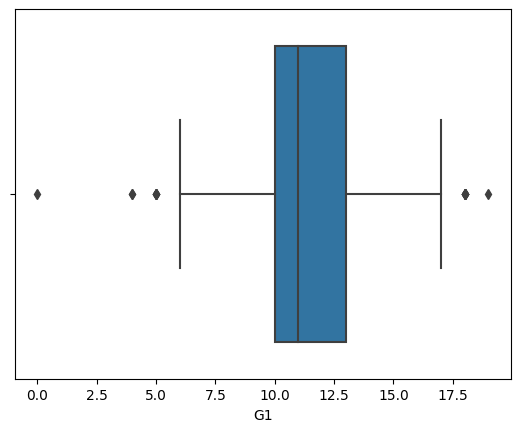

In [18]:
sns.boxplot(x=data['G1'])

<Axes: xlabel='G2'>

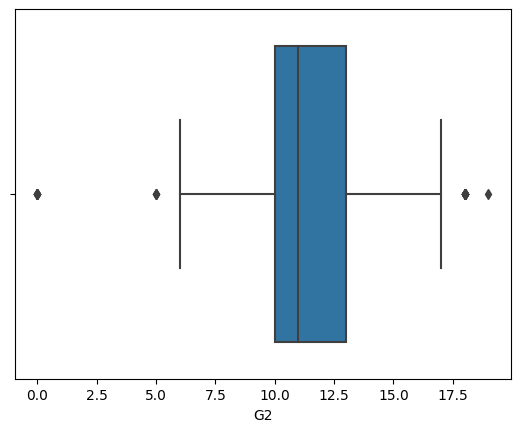

In [19]:
sns.boxplot(x = data['G2'])

<Axes: xlabel='G3'>

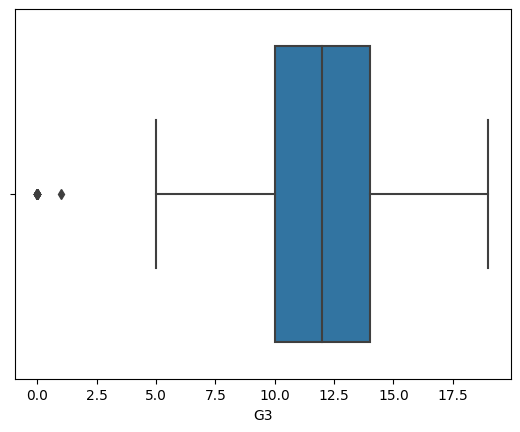

In [20]:
sns.boxplot(x = data['G3'])

<Axes: xlabel='absences'>

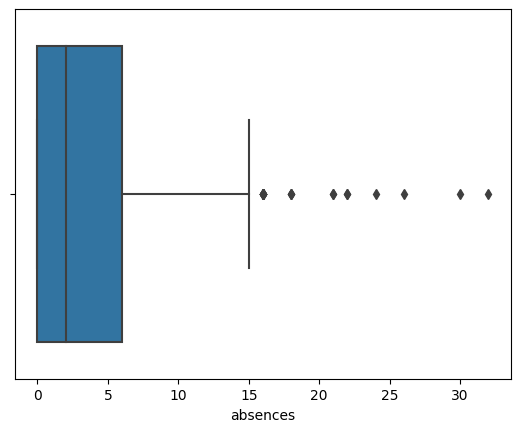

In [21]:
sns.boxplot(x = data['absences'])

We can see that there are more number of outliners in graph of absences and also we can also see from the describe that the max_absences is far more greater than the mean_absences

In [22]:
# Position of the Outlier
print(np.where(data['absences']>15))


(array([ 40, 103, 150, 155, 161, 197, 206, 211, 212, 217, 230, 253, 254,
       256, 263, 311, 325, 326, 397, 405, 413]),)


In [24]:
# IQR(Inter Quatile Range)
Q1 = np.percentile(data['absences'],25, method='midpoint')
Q3 = np.percentile(data['absences'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)


6.0


In [29]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.where(data['absences']>=upper)[0]


#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.where(data['absences']<=lower)[0]



In [30]:
data.drop(index = upper_array,inplace = True)
data.drop(index = lower_array,inplace = True)
print(data.shape)


(626, 33)


<Axes: xlabel='absences'>

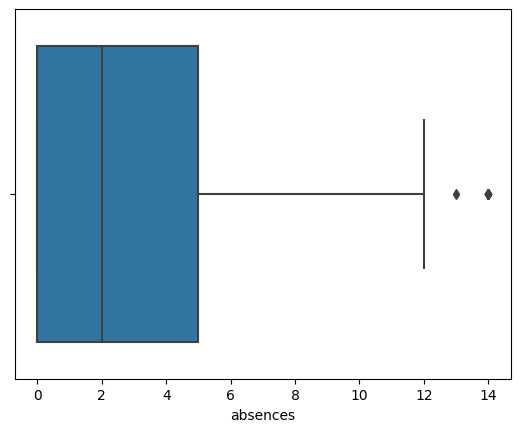

In [31]:
sns.boxplot(x = data['absences'])

Plot different features against one other

Text(0, 0.5, 'Number of students')

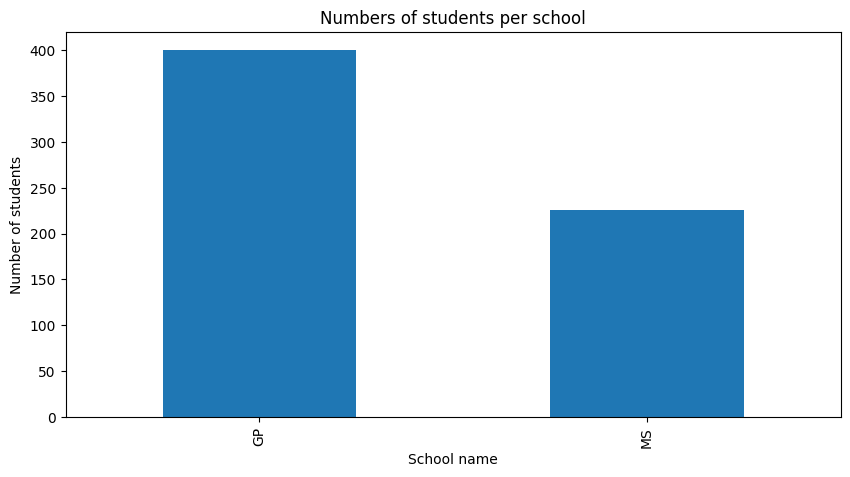

In [32]:
data.school.value_counts().plot(kind = 'bar',figsize = (10,5))
plt.title("Numbers of students per school")
plt.xlabel("School name")
plt.ylabel("Number of students")

<Axes: xlabel='G1', ylabel='Count'>

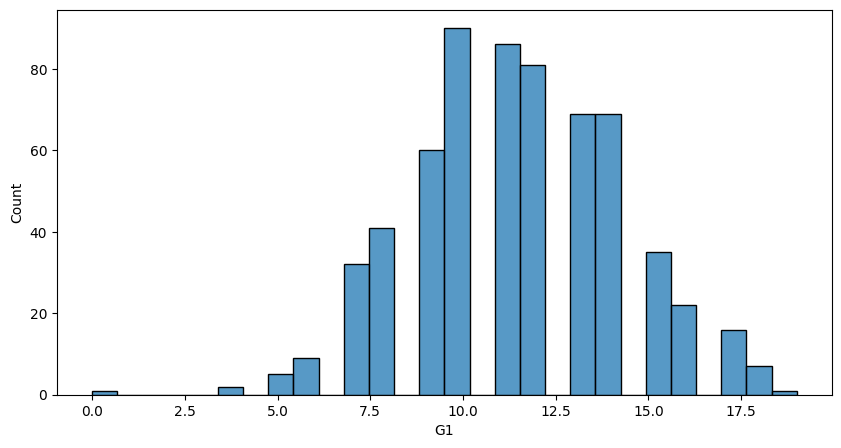

In [33]:
plt.figure(figsize = (10,5))
sns.histplot(data['G1'])

<Axes: xlabel='G2', ylabel='Count'>

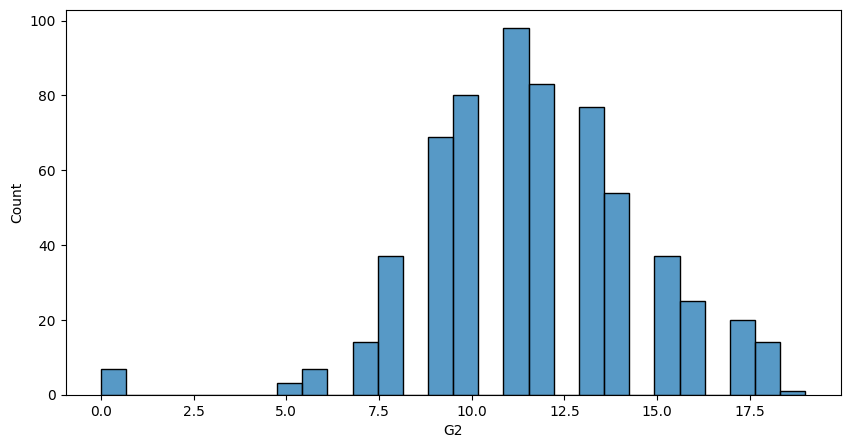

In [34]:
plt.figure(figsize = (10,5))
sns.histplot(data['G2'])

<Axes: xlabel='G3', ylabel='Count'>

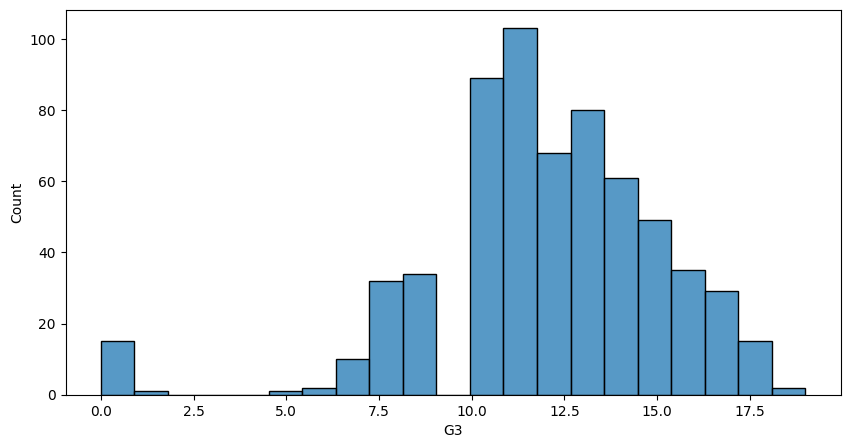

In [35]:
plt.figure(figsize = (10,5))
sns.histplot(data['G3'])

<Axes: xlabel='studytime', ylabel='G3'>

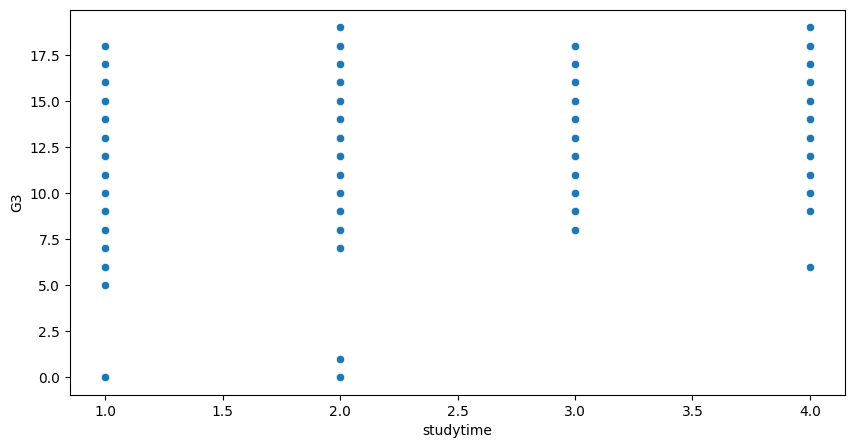

In [85]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = data['studytime'],y = data['G3'])

Text(0, 0.5, 'Grades')

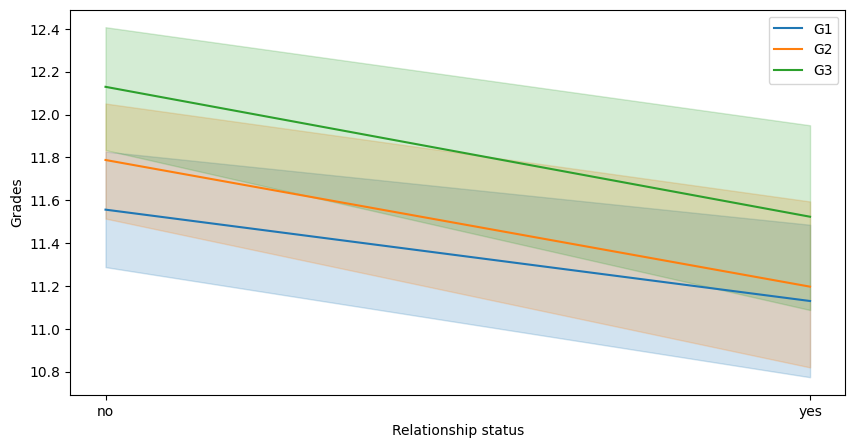

In [89]:
plt.figure(figsize = (10,5))
fig = sns.lineplot(x = data['romantic'],y = data['G1'],label='G1')
sns.lineplot(x = data['romantic'],y = data['G2'],label='G2')
sns.lineplot(x = data['romantic'],y = data['G3'],label='G3')
fig.set_xlabel("Relationship status")
fig.set_ylabel("Grades")

<Axes: xlabel='goout', ylabel='failures'>

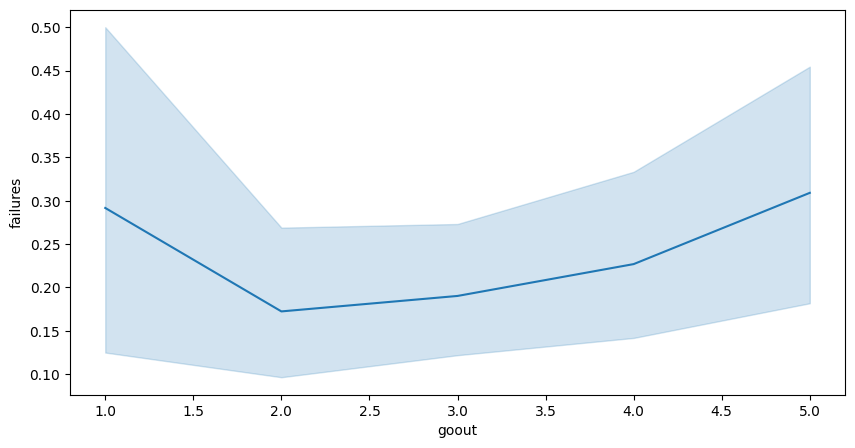

In [87]:
plt.figure(figsize = (10,5))
sns.lineplot(x = data['goout'],y = data['failures'],)


<Axes: xlabel='studytime', ylabel='G3'>

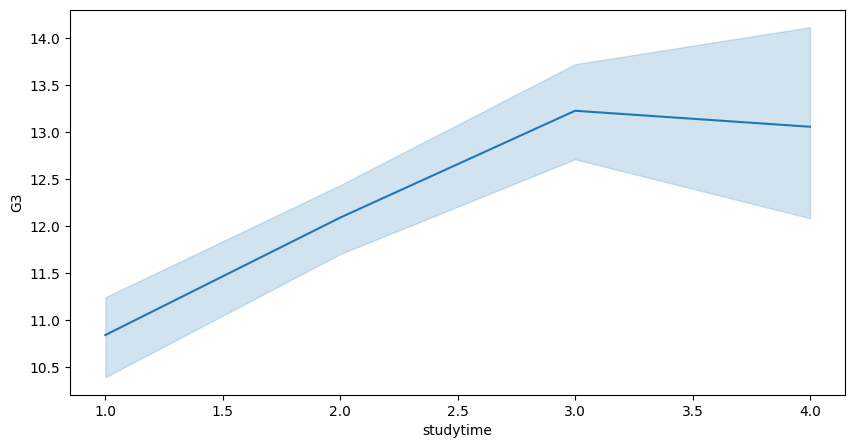

In [86]:
plt.figure(figsize = (10,5))
sns.lineplot(x = data['studytime'],y = data['G3'])


<ipython-input-75-18252fd29b08>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = data.corr()


<Axes: >

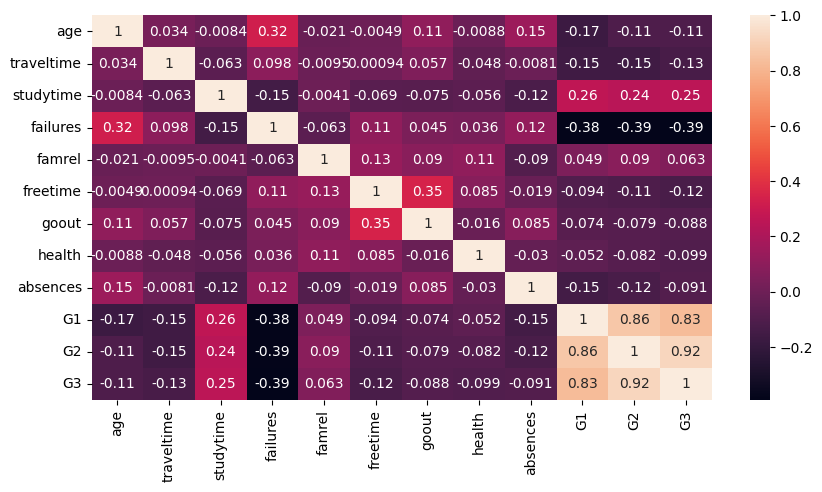

In [75]:
plt.figure(figsize = (10,5))
c = data.corr()
sns.heatmap(c,annot = True)